## todo

- loading model and vectors
- build a Dataframe with words and vectors

In [1]:
# modules
import sys
sys.path.extend(["../src"])

from gensim.models import Word2Vec
import logging
import os

# report tools
import pandas as pd

# dump data
import pickle

# logging
logging.basicConfig(level=logging.INFO)
log = logging.info

from datetime import datetime

from doc2vec_model import TaggedLineSentence

# today
today = datetime.today().strftime(format='%Y%m%d')

In [2]:
corpus_txt_filepath = os.path.join('..', 'data', 'comment_data_clean_0420.txt')

sources = {
    corpus_txt_filepath: 'CONTENT',}

logging.info('TaggedDocument')
sentences = TaggedLineSentence(sources, token_name='jieba', user_dict=True)

# getting the sentence array and the count dict
sentences_array = sentences.to_sentences()
counter = sentences.counter()
feature_num = 100

logging.info('word2vec')
# training the word2vec model
if 1 == 0:
    w2v_model_filepath = os.path.join('..', 'model', 'w2v_model_{}.w2v'.format(today))
    w2v_model = Word2Vec(sg=1,
                         min_count=3,
                         window=8, 
                         size=feature_num, 
                         sample=1e-4, 
                         negative=5, 
                         workers=4,)
    
    w2v_model.build_vocab(sentences_array)
    
    logging.info('Epoch')
    for epoch in range(30):
        logging.info('EPOCH: {}'.format(epoch))
        w2v_model.train(sentences_array)
        
        if epoch % 10 == 0:
            logging.info('Model Save')
            w2v_model.save(w2v_model_filepath)
else:
    w2v_model_filepath = os.path.join('..', 'model', 'w2v_model_20170420.w2v')

# loading model
w2v_model = Word2Vec.load(w2v_model_filepath)

INFO:root:TaggedDocument
Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/6q/c991lmmd3jlc7g6gk6yg7x380000gn/T/jieba.cache
DEBUG:jieba:Loading model from cache /var/folders/6q/c991lmmd3jlc7g6gk6yg7x380000gn/T/jieba.cache


Model loaded succeed


Loading model cost 0.734 seconds.
DEBUG:jieba:Loading model cost 0.734 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.
INFO:root:word2vec
INFO:gensim.utils:loading Word2Vec object from ../model/w2v_model_20170420.w2v
INFO:gensim.utils:loading wv recursively from ../model/w2v_model_20170420.w2v.wv.* with mmap=None
INFO:gensim.utils:setting ignored attribute syn0norm to None
INFO:gensim.utils:setting ignored attribute cum_table to None
INFO:gensim.models.word2vec:Model saved using code from earlier Gensim Version. Re-loading old model in a compatible way.
INFO:gensim.models.deprecated.old_saveload:loading Word2Vec object from ../model/w2v_model_20170420.w2v
INFO:gensim.models.deprecated.old_saveload:loading wv recursively from ../model/w2v_model_20170420.w2v.wv.* with mmap=None
INFO:gensim.utils:setting ignored attribute syn0norm to None
INFO:gensim.models.deprecated.old_saveload:setting ignored attribute cum_table to None
INFO:gensim.

In [3]:
# build a list of the terms, integer indices,
# and term counts from the food2vec model vocabulary
model = w2v_model
ordered_vocab = [(term, voc.index, voc.count)
                 for term, voc in model.wv.vocab.items()]

# sort by the term counts, so the most common terms appear first
def get_keys(item):
    return - item[2]

ordered_vocab = sorted(ordered_vocab, key=get_keys)

# unzip the terms, integer indices, and counts into separate lists
ordered_terms, term_indices, term_counts = zip(*ordered_vocab)

# create a DataFrame with the food2vec vectors as data,
# and the terms as row labels

from collections import OrderedDict

vector_dct = OrderedDict()
for term in ordered_terms:
    vector_dct[term] = model[term]
    
word_vectors = pd.DataFrame.from_dict(vector_dct, orient='index')

/Users/ted.zhao/anaconda3/envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:23: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [4]:
word_vectors.head(5)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
软件,0.128061,-0.373346,-0.016569,-0.219186,-0.114867,0.019903,0.142719,-0.194738,0.090477,-0.066230,...,0.068516,-0.055228,-0.033246,0.002621,0.528090,-0.013000,0.205419,-0.083357,-0.027482,-0.023449
用,0.124827,-0.199755,0.150328,-0.197269,-0.081344,0.065726,-0.145723,-0.042646,0.189504,0.006941,...,0.193375,-0.035380,0.089570,0.017563,0.443689,0.163924,0.207234,0.102147,0.082945,-0.019180
很,0.064048,-0.297728,0.303864,-0.055339,-0.223893,-0.038080,0.039899,-0.062641,0.110722,0.005581,...,-0.104770,0.001161,0.176739,-0.153217,0.398849,-0.016741,-0.010187,0.008011,0.088923,-0.088943
好用,0.227965,-0.207137,0.298344,-0.139684,-0.074247,-0.152910,-0.187501,-0.160831,0.095257,-0.246622,...,-0.038545,-0.148362,0.118246,0.050927,0.443010,0.195227,0.012120,0.145060,0.031777,-0.352653
不错,0.110558,-0.200231,0.243898,-0.051324,0.157425,-0.037802,-0.155863,-0.090334,0.049472,-0.160942,...,0.047151,-0.207369,0.117077,-0.158928,0.408173,0.104645,-0.006355,-0.078138,-0.010382,-0.073174


In [5]:
word_vectors.shape

(9559, 100)

In [6]:
def get_related_terms(token, topn=10):
    """
    look up the topn most similar terms to token
    and print them as a formatted list
    """

    for word, similarity in model.most_similar(positive=[token], topn=topn):

        print(u'{:20} {}'.format(word, round(similarity, 3)))

In [7]:
def word_algebra(add=[], subtract=[], topn=1):
    """
    combine the vectors associated with the words provided
    in add= and subtract=, look up the topn most similar
    terms to the combined vector, and print the result(s)
    """
    answers = model.most_similar(positive=add, negative=subtract, topn=topn)
    
    for term, similarity in answers:
        print(term)

In [8]:
get_related_terms('界面')

/Users/ted.zhao/anaconda3/envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys
INFO:gensim.models.keyedvectors:precomputing L2-norms of word weight vectors


页面                   0.74
简洁                   0.717
形式多样                 0.632
扩展性                  0.621
清晰                   0.602
功能                   0.596
设计                   0.588
简单易行                 0.583
新版本                  0.578
整齐                   0.573


In [9]:
word_algebra(add=['界面'], subtract=['垃圾'], topn=5)

简洁
美观
明亮
明快
见面


/Users/ted.zhao/anaconda3/envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


In [10]:
word_algebra(add=['功能', '垃圾'], topn=5)

不能
不好用
没有
界面
太


/Users/ted.zhao/anaconda3/envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


In [11]:
word_vectors.values.tofile("../raw_wv.tsv", sep='\t')

## Word Vector Visualization with t-SNE

In [12]:
from sklearn.manifold import TSNE


class TsneConfig:
    tsne_filepath = os.path.join('..',
                                 'tsne',
                                 'tsne_model')

    tsne_vectors_filepath = os.path.join('..',
                                         'tsne',
                                         'tsne_vectors.npy')

    tsne_input = word_vectors
    
    tsne3d_filepath = os.path.join('..',
                                 'tsne',
                                 'tsne_model_3d')

    tsne3d_vectors_filepath = os.path.join('..',
                                         'tsne',
                                         'tsne_vectors_3d.npy')

In [13]:
%%time
# 2d
if 1 == 0:
    
    tsne = TSNE()
    tsne_vectors = tsne.fit_transform(TsneConfig.tsne_input.values)
    
    with open(TsneConfig.tsne_filepath, 'wb') as f:
        pickle.dump(tsne, f)

    tsne_vectors = pd.DataFrame(tsne_vectors,
                            index=pd.Index(tsne_input.index),
                            columns=['x_coord', 'y_coord'])
    
    tsne_vectors.to_pickle(TsneConfig.tsne_vectors_filepath)
    
with open(TsneConfig.tsne_filepath, 'rb') as f:
    tsne = pickle.load(f)
    
tsne_vectors = pd.read_pickle(TsneConfig.tsne_vectors_filepath)

CPU times: user 27.8 ms, sys: 4.78 ms, total: 32.6 ms
Wall time: 30.4 ms


/Users/ted.zhao/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator TSNE from version 0.18.1 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [14]:
tsne_vectors.head()

,x_coord,y_coord
软件,-2.698697,4.416287
用,-2.688325,4.331760
很,-2.418537,4.582443
好用,-2.463559,4.464991
不错,-2.398962,4.438695


In [15]:
tsne_vectors['word'] = tsne_vectors.index

In [16]:
%%time
# 3d
if 1 == 0:
    
    tsne_3d = TSNE(n_components=3)
    tsne_3d_vectors = tsne_3d.fit_transform(TsneConfig.tsne_input.values)
    
    with open(TsneConfig.tsne3d_filepath, 'wb') as f:
        pickle.dump(tsne_3d, f)

    tsne_3d_vectors = pd.DataFrame(tsne_3d_vectors,
                            index=pd.Index(tsne_input.index),
                            columns=['x', 'y', 'z'])
    
    tsne_3d_vectors.to_pickle(TsneConfig.tsne3d_vectors_filepath)
    
with open(TsneConfig.tsne3d_filepath, 'rb') as f:
    tsne_3d = pickle.load(f)
    
tsne_3d_vectors = pd.read_pickle(TsneConfig.tsne3d_vectors_filepath)

CPU times: user 3.95 ms, sys: 1.56 ms, total: 5.5 ms
Wall time: 4.52 ms


### Plotting with Bokeh

In [17]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, value

output_notebook()

Loading BokehJS ...

In [18]:
# add our DataFrame as a ColumnDataSource for Bokeh
plot_data = ColumnDataSource(tsne_vectors)

# create the plot and configure the
# title, dimensions, and tools
tsne_plot = figure(title=u't-SNE Word Embeddings',
                   plot_width = 800,
                   plot_height = 800,
                   tools= ('pan, wheel_zoom, box_zoom,'
                           'box_select, reset'),
                   active_scroll='wheel_zoom')

# add a hover tool to display words on roll-over
tsne_plot.add_tools( HoverTool(tooltips = '@word') )

# draw the words as circles on the plot
tsne_plot.circle('x_coord', 'y_coord', source=plot_data,
                 color='blue', line_alpha=0.2, fill_alpha=0.1,
                 size=10, hover_line_color='black')

# configure visual elements of the plot
tsne_plot.title.text_font_size = value('16pt')
tsne_plot.xaxis.visible = False
tsne_plot.yaxis.visible = False
tsne_plot.grid.grid_line_color = None
tsne_plot.outline_line_color = None

# engage!
show(tsne_plot);

# plot

In [19]:
!pip install hypertools

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [25]:
import hypertools as hyp

%matplotlib inline

In [40]:
hyp.plot?

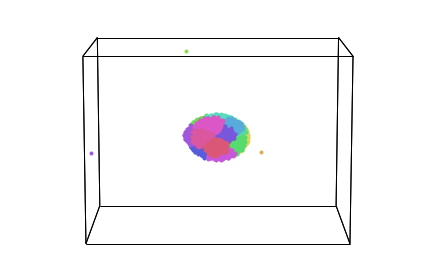

In [43]:
hyp.plot(tsne_3d_vectors.values, '.', n_clusters=20, animate='spin')